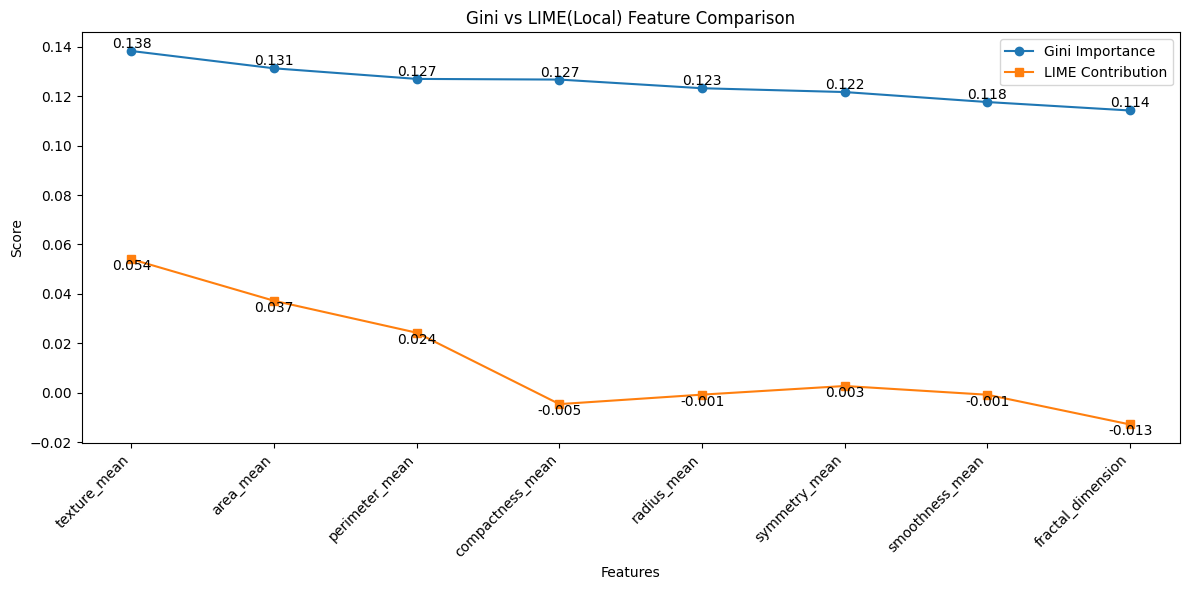

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gini_data = {
    "Feature": [
        "texture_mean", "area_mean", "perimeter_mean",
        "compactness_mean", "radius_mean", "symmetry_mean",
        "smoothness_mean", "fractal_dimension"
    ],
    "Gini_Importance": [
        0.138282, 0.131275, 0.126990, 0.126722,
        0.123219, 0.121672, 0.117629, 0.114211
    ]
}
lime_data = {
    "Feature": [
        "texture_mean", "area_mean", "id", "perimeter_mean",
        "fractal_dimension", "compactness_mean",
        "symmetry_mean", "smoothness_mean", "radius_mean"
    ],
    "LIME_Contribution": [
        0.054033, 0.037206, -0.026135, 0.024281,
        -0.012847, -0.004606, 0.002725, -0.000812, -0.000769
    ]
}

# Convert to DataFrames
df_gini = pd.DataFrame(gini_data)
df_lime = pd.DataFrame(lime_data)

# Merge both tables
merged = pd.merge(df_gini, df_lime, on="Feature", how="inner")

# Create x axis
x = np.arange(len(merged["Feature"]))

# -------- Line Plot --------
plt.figure(figsize=(12,6))
plt.plot(x, merged["Gini_Importance"], marker='o', label="Gini Importance")
plt.plot(x, merged["LIME_Contribution"], marker='s', label="LIME Contribution")

# Labels
plt.xticks(x, merged["Feature"], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Score")
plt.title("Gini vs LIME(Local) Feature Comparison")

# Value labels
for i, v in enumerate(merged["Gini_Importance"]):
    plt.text(i, v, f"{v:.3f}", ha='center', va='bottom')

for i, v in enumerate(merged["LIME_Contribution"]):
    plt.text(i, v, f"{v:.3f}", ha='center', va='top')

plt.legend()
plt.tight_layout()
plt.show()


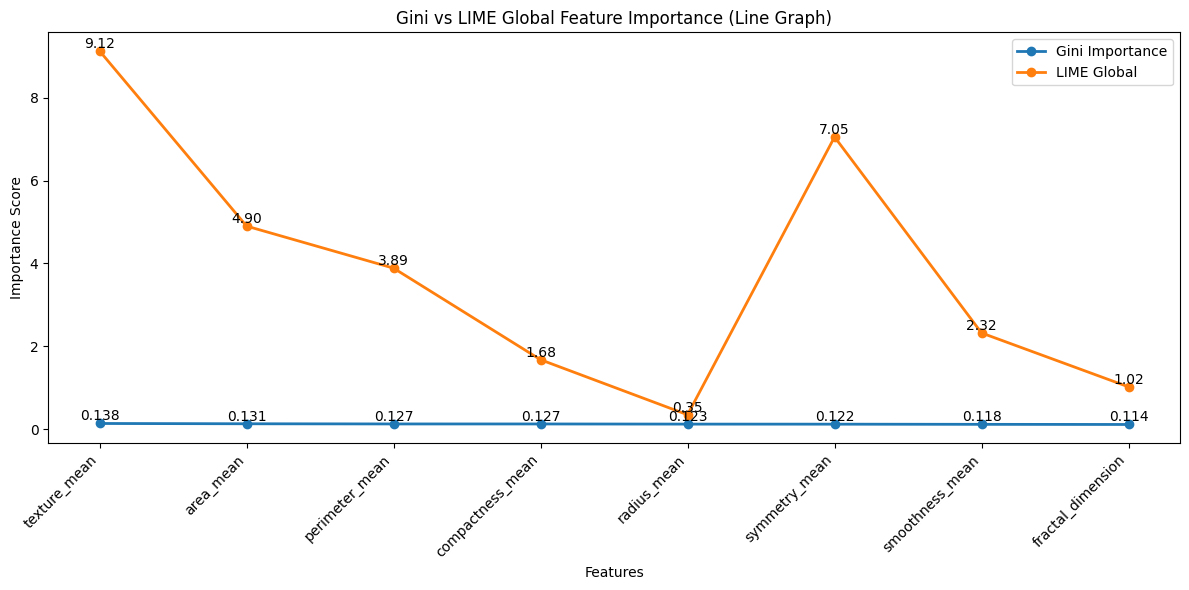

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----- Gini data -----
gini_data = {
    "Feature": [
        "texture_mean", "area_mean", "perimeter_mean",
        "compactness_mean", "radius_mean", "symmetry_mean",
        "smoothness_mean", "fractal_dimension"
    ],
    "Gini_Importance": [
        0.138282, 0.131275, 0.126990, 0.126722,
        0.123219, 0.121672, 0.117629, 0.114211
    ]
}

# ----- LIME Global data -----
lime_data = {
    "Feature": [
        "texture_mean", "symmetry_mean", "area_mean",
        "id", "perimeter_mean", "smoothness_mean",
        "compactness_mean", "fractal_dimension", "radius_mean"
    ],
    "LIME_Global": [
        9.123975, 7.050252, 4.899896, 4.021426,
        3.885071, 2.322098, 1.676443, 1.021534, 0.348944
    ]
}

# Convert to DataFrame
df_gini = pd.DataFrame(gini_data)
df_lime = pd.DataFrame(lime_data)

# Merge by common features
merged = pd.merge(df_gini, df_lime, on="Feature", how="inner")

# X positions
x = np.arange(len(merged["Feature"]))

# ---- Line Graph ----
plt.figure(figsize=(12,6))

plt.plot(x, merged["Gini_Importance"], marker="o", linewidth=2, label="Gini Importance")
plt.plot(x, merged["LIME_Global"], marker="o", linewidth=2, label="LIME Global")

# Labels
plt.xticks(x, merged["Feature"], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Gini vs LIME Global Feature Importance")

# Add value labels
for i, v in enumerate(merged["Gini_Importance"]):
    plt.text(i, v, f"{v:.3f}", ha="center", va="bottom")

for i, v in enumerate(merged["LIME_Global"]):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

plt.legend()
plt.tight_layout()
plt.show()


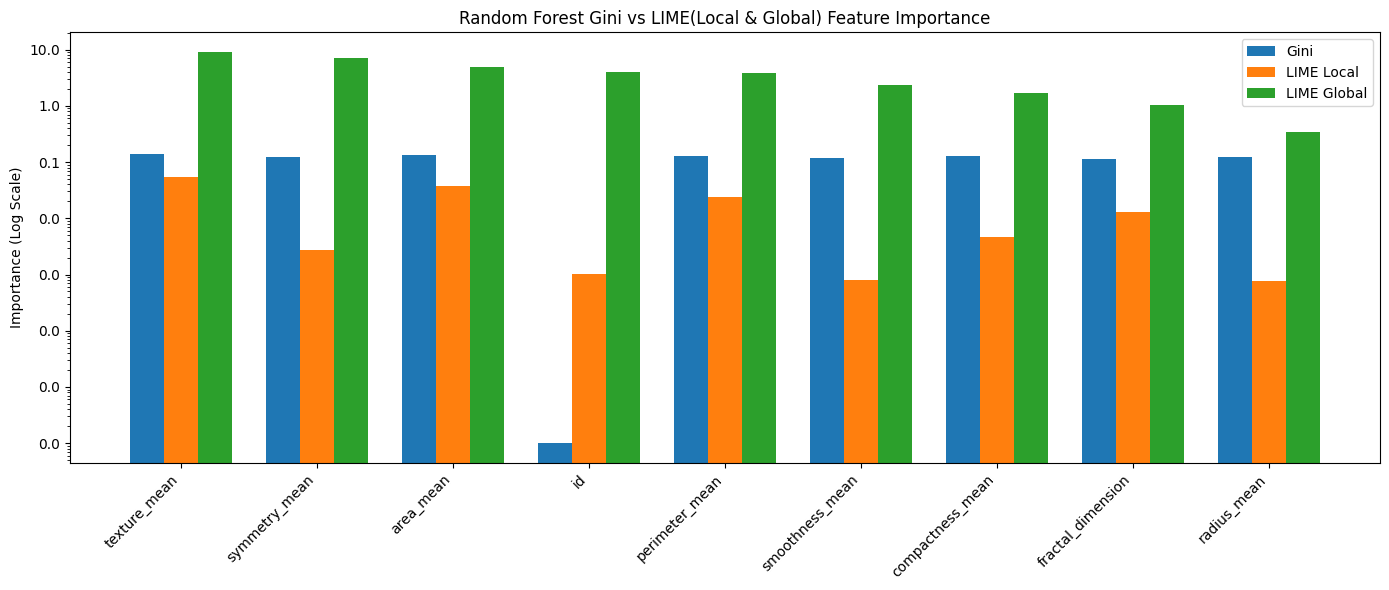

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator, ScalarFormatter

# Data
features = [
    "texture_mean","symmetry_mean","area_mean","id",
    "perimeter_mean","smoothness_mean","compactness_mean",
    "fractal_dimension","radius_mean"
]

gini = np.array([0.138282,0.121672,0.131275,1e-6,
                 0.126990,0.117629,0.126722,0.114211,0.123219])

lime_local = np.array([0.054033,0.002725,0.037206,0.001,
                       0.024281,0.000812,0.004606,0.012847,0.000769])

# Convert negatives to tiny positive values to work with log scale
lime_local = np.abs(lime_local) + 1e-6

lime_global = np.array([9.123975,7.050252,4.899896,4.021426,
                        3.885071,2.322098,1.676443,1.021534,0.348944])

# Bar positions
x = np.arange(len(features))
width = 0.25

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(x - width, gini, width, label="Gini")
ax.bar(x, lime_local, width, label="LIME Local")
ax.bar(x + width, lime_global, width, label="LIME Global")

# Log scale + dense ticks
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=15))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=15))
ax.yaxis.set_major_formatter(ScalarFormatter())

# Labels
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.set_ylabel("Importance (Log Scale)")
ax.set_title("Random Forest Gini vs LIME(Local & Global) Feature Importance")

plt.legend()
plt.tight_layout()
plt.show()
